In [29]:
import pandas as pd
import math

## Open Scrapped data from csv files

In [30]:
jobs_df= pd.read_csv('glassdoor_jobs_Software_Engineer_Toronto.csv')
# change rating -1 to 0
jobs_df['Company Rating'] = jobs_df['Company Rating'].apply(lambda x: '0' if x == '-1' else x)
jobs_df

,Job Title,Job Company,Job Location,Salary Estimate,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue
0,Backend Engineer,AgencyAnalytics,Toronto,CA$90K - CA$130K (Employer est.),0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Software Engineer (Backend NodeJS, Mongo DB)",Edkent Media\n4.6,Toronto,CA$55K - CA$80K (Employer est.),4.6\n★★★★★,33,1 to 50 Employees,2014.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
2,Software Engineer,MetiSign,Toronto,CA$60 - CA$72 Per Hour(Employer est.),0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Software Engineer - MERN,Avanciers Incorporated\n4.0,Toronto,CA$70K - CA$122K (Glassdoor est.),4.0\n★★★★★,13,51 to 200 Employees,2015.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
4,Software Engineer,Robert Half\n3.8,Toronto,NaN,3.8\n★★★★★,553,10000+ Employees,1948.0,Company - Public,Staffing & Outsourcing,Business Services,$5 to $10 billion (USD)
...,...,...,...,...,...,...,...,...,...,...,...,...
496,software engineer,Zillnk Technology Inc,Toronto,CA$70K - CA$120K (Employer est.),0,0,NaN,NaN,NaN,NaN,NaN,NaN
497,Entry Level Software Engineer,Avanade\n4.2,Toronto,CA$60K - CA$120K (Glassdoor est.),4.2\n★★★★★,469,10000+ Employees,2000.0,Company - Private,IT Services,Information Technology,$2 to $5 billion (USD)
498,"Software Development Engineer, Supply Forecasting",Amazon Dev Centre Canada ULC\n3.7,Toronto,CA$100K - CA$130K (Glassdoor est.),3.7\n★★★★★,4703,10000+ Employees,1994.0,Company - Public,Internet,Information Technology,$10+ billion (USD)
499,"Software Development Engineer, WorkEvents Team",Amazon Dev Centre Canada ULC\n3.7,Toronto,CA$100K - CA$130K (Glassdoor est.),3.7\n★★★★★,4703,10000+ Employees,1994.0,Company - Public,Internet,Information Technology,$10+ billion (USD)


## Clean Salary Data
clean the salary data by getting minimum and maximum salary est and separate currency

In [31]:
# drop estimated salary which is nan
jobs_df.dropna(subset = ["Salary Estimate"], inplace=True)
# get salary est range and convert K to 000
salary_est = jobs_df['Salary Estimate'].apply(lambda x: str(x).replace('K','000').split('(')[0].split('-'))
salary_currency = jobs_df['Salary Estimate'].apply(lambda x: str(x).split('$')[0] if str(x).split('$')[0] != '' else 'USD')

# remove currency from salary_est
salary_est = salary_est.apply(lambda x: [salary.split('$')[1] for salary in x])
salary_est

0       [90000 , 130000 ]
1        [55000 , 80000 ]
2      [60 , 72 Per Hour]
3       [70000 , 122000 ]
5      [121000 , 133000 ]
              ...        
496     [70000 , 120000 ]
497     [60000 , 120000 ]
498    [100000 , 130000 ]
499    [100000 , 130000 ]
500    [100000 , 140000 ]
Name: Salary Estimate, Length: 500, dtype: object

In [57]:
# replace salary that contains per hour to yearly, assuming working days = 40hr/week * 52
total_hours = 40*52
salary_est_float = salary_est.apply(lambda x: [float(salary.split()[0])*total_hours if "per hour" in ''.join(x).lower() 
                                         else float(salary) for salary in x])
salary_est_float

0       [90000.0, 130000.0]
1        [55000.0, 80000.0]
2      [124800.0, 149760.0]
3       [70000.0, 122000.0]
5      [121000.0, 133000.0]
               ...         
496     [70000.0, 120000.0]
497     [60000.0, 120000.0]
498    [100000.0, 130000.0]
499    [100000.0, 130000.0]
500    [100000.0, 140000.0]
Name: Salary Estimate, Length: 500, dtype: object

In [62]:
# replace salary with no range to set max and min = salary
salary_est_range = salary_est_float.apply(lambda x: x + [x[0]] if len(x) < 2 else x)

# split into maximum and minimum
salary_est_final = pd.DataFrame(columns = ['Maximum', "Minimum", "Currency"])
salary_est_final["Minimum"] = salary_est_range.apply(lambda x: x[0])
salary_est_final["Maximum"] = salary_est_range.apply(lambda x: x[1])
salary_est_final["Currency"] = salary_currency
salary_est_final

,Maximum,Minimum,Currency
0,130000.0,90000.0,CA
1,80000.0,55000.0,CA
2,149760.0,124800.0,CA
3,122000.0,70000.0,CA
5,133000.0,121000.0,CA
...,...,...,...
496,120000.0,70000.0,CA
497,120000.0,60000.0,CA
498,130000.0,100000.0,CA
499,130000.0,100000.0,CA


In [63]:
# clean up company data
jobs_df_cleaned = jobs_df.copy()
del jobs_df_cleaned['Salary Estimate'] # remove salary from test data
jobs_df_cleaned['Job Title'] = jobs_df_cleaned['Job Title']
jobs_df_cleaned['Job Company'] = jobs_df_cleaned['Job Company'].apply(lambda x: x.split('\n')[0])
jobs_df_cleaned['Company Rating'] = jobs_df_cleaned['Company Rating'].apply(lambda x: float(x.split('\n')[0]))
jobs_df_cleaned['Company Founded'] = jobs_df_cleaned['Company Founded'].apply(lambda x: int(x) if not math.isnan(x) else 0)
jobs_df_cleaned.fillna("Unknown", inplace=True)
jobs_df_cleaned

,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue
0,Backend Engineer,AgencyAnalytics,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown
1,"Software Engineer (Backend NodeJS, Mongo DB)",Edkent Media,Toronto,4.6,33,1 to 50 Employees,2014,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
2,Software Engineer,MetiSign,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,Software Engineer - MERN,Avanciers Incorporated,Toronto,4.0,13,51 to 200 Employees,2015,Company - Private,IT Services,Information Technology,$10 to $25 million (USD)
5,Software Engineer Intern (Summer 2022) - Toronto,Coursera,Toronto,3.9,85,501 to 1000 Employees,2012,Company - Public,Colleges & Universities,Education,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
496,software engineer,Zillnk Technology Inc,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown
497,Entry Level Software Engineer,Avanade,Toronto,4.2,469,10000+ Employees,2000,Company - Private,IT Services,Information Technology,$2 to $5 billion (USD)
498,"Software Development Engineer, Supply Forecasting",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD)
499,"Software Development Engineer, WorkEvents Team",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD)


In [37]:
# Get Seniority Job level
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "principal" in title.lower() or "lead" in title.lower():
        return "Senior"
    elif "intern" in title.lower():
        return "Intern"
    elif "grad" in title.lower() or "entry" in title.lower() or "junior" in title.lower():
        return "Junior"
    else:
        return "Normal"
    
jobs_df_cleaned["Level"] = jobs_df['Job Title'].apply(lambda x: seniority(x))
jobs_df_cleaned

,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level
0,Backend Engineer,AgencyAnalytics,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown,Normal
1,"Software Engineer (Backend NodeJS, Mongo DB)",Edkent Media,Toronto,4.6,33,1 to 50 Employees,2014,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Normal
2,Software Engineer,MetiSign,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown,Normal
3,Software Engineer - MERN,Avanciers Incorporated,Toronto,4.0,13,51 to 200 Employees,2015,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),Normal
5,Software Engineer Intern (Summer 2022) - Toronto,Coursera,Toronto,3.9,85,501 to 1000 Employees,2012,Company - Public,Colleges & Universities,Education,Unknown / Non-Applicable,Intern
...,...,...,...,...,...,...,...,...,...,...,...,...
496,software engineer,Zillnk Technology Inc,Toronto,0.0,0,Unknown,0,Unknown,Unknown,Unknown,Unknown,Normal
497,Entry Level Software Engineer,Avanade,Toronto,4.2,469,10000+ Employees,2000,Company - Private,IT Services,Information Technology,$2 to $5 billion (USD),Junior
498,"Software Development Engineer, Supply Forecasting",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD),Normal
499,"Software Development Engineer, WorkEvents Team",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD),Normal


In [38]:
# parse classification data to int type
class_data = ['Company Size', 'Company Type', 'Company Industry', 'Company Sector', 'Company Revenue', 'Level']
for column in class_data:
    company_col_data = list(set(jobs_df_cleaned[column].to_list()))
    jobs_df_cleaned[column] = jobs_df_cleaned[column].apply(lambda x: company_col_data.index(x))
jobs_df_cleaned

,Job Title,Job Company,Job Location,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level
0,Backend Engineer,AgencyAnalytics,Toronto,0.0,0,0,0,0,0,0,0,1
1,"Software Engineer (Backend NodeJS, Mongo DB)",Edkent Media,Toronto,4.6,33,4,2014,2,4,2,3,1
2,Software Engineer,MetiSign,Toronto,0.0,0,0,0,0,0,0,0,1
3,Software Engineer - MERN,Avanciers Incorporated,Toronto,4.0,13,6,2015,2,7,5,5,1
5,Software Engineer Intern (Summer 2022) - Toronto,Coursera,Toronto,3.9,85,2,2012,3,9,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
496,software engineer,Zillnk Technology Inc,Toronto,0.0,0,0,0,0,0,0,0,1
497,Entry Level Software Engineer,Avanade,Toronto,4.2,469,3,2000,2,7,5,10,2
498,"Software Development Engineer, Supply Forecasting",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,3,1994,3,11,5,4,1
499,"Software Development Engineer, WorkEvents Team",Amazon Dev Centre Canada ULC,Toronto,3.7,4703,3,1994,3,11,5,4,1


In [39]:
jobs_df_cleaned.describe()

,Company Rating,Company Rating Numbers,Company Size,Company Founded,Company Type,Company Industry,Company Sector,Company Revenue,Level
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,2.874600,1500.136000,2.840000,1290.820000,1.904000,6.64800,2.918000,3.548000,1.378000
std,1.721028,2597.262776,2.151199,937.141939,1.165118,5.33714,2.337992,3.169193,0.565469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,1.000000,1.000000
50%,3.700000,218.000000,3.000000,1993.000000,2.000000,8.00000,3.000000,4.000000,1.000000
75%,3.900000,2211.000000,3.000000,1994.000000,3.000000,11.00000,5.000000,4.000000,2.000000
max,5.000000,14362.000000,7.000000,2017.000000,4.000000,16.00000,10.000000,12.000000,3.000000


<AxesSubplot:>

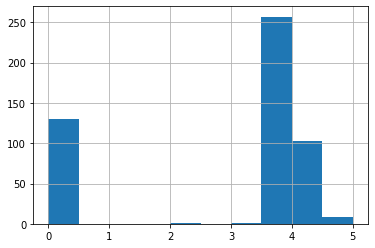

In [40]:
jobs_df_cleaned['Company Rating'].hist()

<AxesSubplot:>

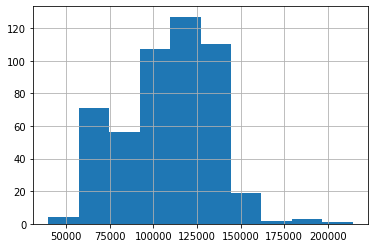

In [43]:
salary_est_final['Maximum'].hist()

<AxesSubplot:>

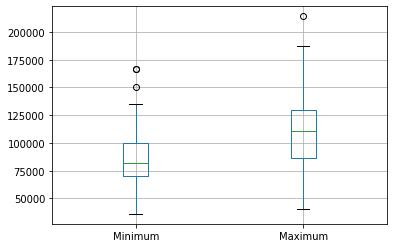

In [44]:
salary_est_final.boxplot(column = ['Minimum', 'Maximum'])